## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.925114  1.740189 -0.635736  0.333147 -0.144870  0.220263
1  0.485659 -0.702904 -1.713725  1.010173  0.414080  1.465207
2  1.350192 -0.005862  1.730609 -1.107682 -0.827367  0.688961
3 -0.523114  1.114475  0.680140  0.738007  0.204953  0.864632
4 -1.263316  1.300569  0.206871  1.194055  1.499231  0.507066


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9737351	total: 71.8ms	remaining: 1m 11s
1:	learn: 0.9636801	total: 72.5ms	remaining: 36.2s
2:	learn: 0.9525978	total: 73.1ms	remaining: 24.3s
3:	learn: 0.9424942	total: 73.7ms	remaining: 18.3s
4:	learn: 0.9340407	total: 74.1ms	remaining: 14.7s
5:	learn: 0.9251507	total: 74.5ms	remaining: 12.3s
6:	learn: 0.9147058	total: 75ms	remaining: 10.6s
7:	learn: 0.9043310	total: 75.4ms	remaining: 9.35s
8:	learn: 0.8964317	total: 75.9ms	remaining: 8.36s
9:	learn: 0.8871836	total: 76.3ms	remaining: 7.56s
10:	learn: 0.8774889	total: 76.7ms	remaining: 6.89s
11:	learn: 0.8679277	total: 77.1ms	remaining: 6.34s
12:	learn: 0.8584166	total: 77.5ms	remaining: 5.88s
13:	learn: 0.8510497	total: 77.9ms	remaining: 5.48s
14:	learn: 0.8440529	total: 78.3ms	remaining: 5.14s
15:	learn: 0.8355694	total: 78.7ms	remaining: 4.84s
16:	learn: 0.8285321	total: 79.1ms	remaining: 4.57s
17:	learn: 0.8203178	total: 79.5ms	remaining: 4.34s
18:	learn: 0.8140121	total: 79.9ms	remaining:

53:	learn: 0.6061501	total: 96.2ms	remaining: 1.69s
54:	learn: 0.6010769	total: 96.7ms	remaining: 1.66s
55:	learn: 0.5964142	total: 97.1ms	remaining: 1.64s
56:	learn: 0.5923011	total: 97.6ms	remaining: 1.61s
57:	learn: 0.5888540	total: 98.1ms	remaining: 1.59s
58:	learn: 0.5849253	total: 98.5ms	remaining: 1.57s
59:	learn: 0.5800540	total: 98.9ms	remaining: 1.55s
60:	learn: 0.5747263	total: 99.4ms	remaining: 1.53s
61:	learn: 0.5705092	total: 99.8ms	remaining: 1.51s
62:	learn: 0.5660245	total: 100ms	remaining: 1.49s
63:	learn: 0.5615766	total: 101ms	remaining: 1.47s
64:	learn: 0.5564759	total: 101ms	remaining: 1.46s
65:	learn: 0.5526166	total: 102ms	remaining: 1.44s
66:	learn: 0.5478315	total: 102ms	remaining: 1.42s
67:	learn: 0.5440950	total: 102ms	remaining: 1.4s
68:	learn: 0.5396116	total: 103ms	remaining: 1.39s
69:	learn: 0.5356520	total: 103ms	remaining: 1.37s
70:	learn: 0.5317547	total: 104ms	remaining: 1.36s
71:	learn: 0.5286581	total: 104ms	remaining: 1.34s
72:	learn: 0.5241147	to

239:	learn: 0.1699163	total: 184ms	remaining: 584ms
240:	learn: 0.1691440	total: 185ms	remaining: 582ms
241:	learn: 0.1682939	total: 185ms	remaining: 580ms
242:	learn: 0.1672878	total: 186ms	remaining: 579ms
243:	learn: 0.1661044	total: 186ms	remaining: 577ms
244:	learn: 0.1649629	total: 187ms	remaining: 575ms
245:	learn: 0.1639025	total: 187ms	remaining: 574ms
246:	learn: 0.1629659	total: 188ms	remaining: 572ms
247:	learn: 0.1617327	total: 188ms	remaining: 571ms
248:	learn: 0.1609079	total: 189ms	remaining: 569ms
249:	learn: 0.1598847	total: 189ms	remaining: 568ms
250:	learn: 0.1587804	total: 190ms	remaining: 567ms
251:	learn: 0.1579728	total: 190ms	remaining: 565ms
252:	learn: 0.1570079	total: 191ms	remaining: 563ms
253:	learn: 0.1559937	total: 191ms	remaining: 562ms
254:	learn: 0.1552038	total: 192ms	remaining: 561ms
255:	learn: 0.1542544	total: 192ms	remaining: 559ms
256:	learn: 0.1535604	total: 193ms	remaining: 558ms
257:	learn: 0.1524556	total: 194ms	remaining: 557ms
258:	learn: 

434:	learn: 0.0586770	total: 280ms	remaining: 364ms
435:	learn: 0.0585273	total: 281ms	remaining: 363ms
436:	learn: 0.0582376	total: 281ms	remaining: 362ms
437:	learn: 0.0577861	total: 282ms	remaining: 362ms
438:	learn: 0.0576497	total: 282ms	remaining: 361ms
439:	learn: 0.0572072	total: 283ms	remaining: 360ms
440:	learn: 0.0569280	total: 283ms	remaining: 359ms
441:	learn: 0.0566981	total: 283ms	remaining: 358ms
442:	learn: 0.0564165	total: 284ms	remaining: 357ms
443:	learn: 0.0561212	total: 284ms	remaining: 356ms
444:	learn: 0.0558443	total: 285ms	remaining: 355ms
445:	learn: 0.0557143	total: 286ms	remaining: 355ms
446:	learn: 0.0553934	total: 286ms	remaining: 354ms
447:	learn: 0.0551264	total: 287ms	remaining: 353ms
448:	learn: 0.0548392	total: 287ms	remaining: 352ms
449:	learn: 0.0545722	total: 288ms	remaining: 351ms
450:	learn: 0.0541579	total: 288ms	remaining: 351ms
451:	learn: 0.0538205	total: 288ms	remaining: 350ms
452:	learn: 0.0535436	total: 289ms	remaining: 349ms
453:	learn: 

622:	learn: 0.0254382	total: 368ms	remaining: 223ms
623:	learn: 0.0253792	total: 369ms	remaining: 222ms
624:	learn: 0.0252561	total: 369ms	remaining: 221ms
625:	learn: 0.0251495	total: 369ms	remaining: 221ms
626:	learn: 0.0250339	total: 370ms	remaining: 220ms
627:	learn: 0.0249211	total: 370ms	remaining: 219ms
628:	learn: 0.0248634	total: 371ms	remaining: 219ms
629:	learn: 0.0247532	total: 371ms	remaining: 218ms
630:	learn: 0.0246964	total: 372ms	remaining: 217ms
631:	learn: 0.0245631	total: 372ms	remaining: 217ms
632:	learn: 0.0244560	total: 372ms	remaining: 216ms
633:	learn: 0.0243257	total: 373ms	remaining: 215ms
634:	learn: 0.0241793	total: 373ms	remaining: 215ms
635:	learn: 0.0240534	total: 374ms	remaining: 214ms
636:	learn: 0.0239505	total: 374ms	remaining: 213ms
637:	learn: 0.0237974	total: 374ms	remaining: 212ms
638:	learn: 0.0236998	total: 375ms	remaining: 212ms
639:	learn: 0.0235508	total: 376ms	remaining: 211ms
640:	learn: 0.0234491	total: 376ms	remaining: 211ms
641:	learn: 

833:	learn: 0.0119534	total: 463ms	remaining: 92.2ms
834:	learn: 0.0119196	total: 464ms	remaining: 91.7ms
835:	learn: 0.0118932	total: 464ms	remaining: 91.1ms
836:	learn: 0.0118557	total: 465ms	remaining: 90.5ms
837:	learn: 0.0118299	total: 465ms	remaining: 89.9ms
838:	learn: 0.0118080	total: 466ms	remaining: 89.5ms
839:	learn: 0.0117823	total: 467ms	remaining: 88.9ms
840:	learn: 0.0117607	total: 467ms	remaining: 88.4ms
841:	learn: 0.0117357	total: 468ms	remaining: 87.8ms
842:	learn: 0.0117109	total: 468ms	remaining: 87.2ms
843:	learn: 0.0116897	total: 469ms	remaining: 86.6ms
844:	learn: 0.0116368	total: 469ms	remaining: 86.1ms
845:	learn: 0.0116004	total: 470ms	remaining: 85.5ms
846:	learn: 0.0115760	total: 470ms	remaining: 84.9ms
847:	learn: 0.0115401	total: 470ms	remaining: 84.3ms
848:	learn: 0.0115082	total: 471ms	remaining: 83.7ms
849:	learn: 0.0114842	total: 471ms	remaining: 83.2ms
850:	learn: 0.0114750	total: 472ms	remaining: 82.6ms
851:	learn: 0.0114546	total: 472ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

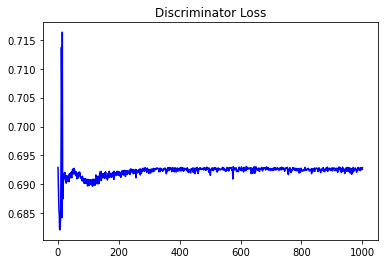

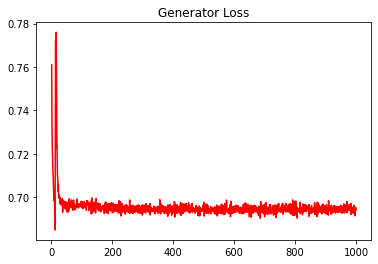

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.051056815396904806


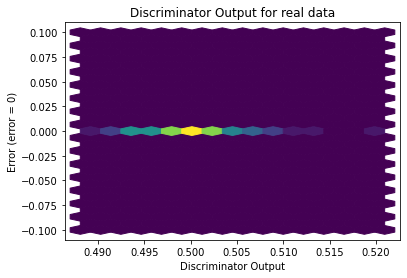

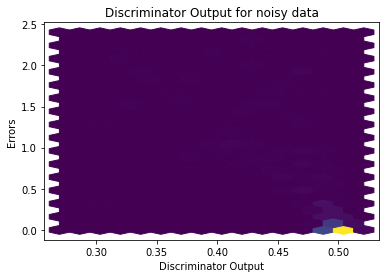

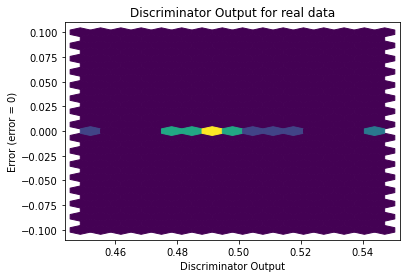

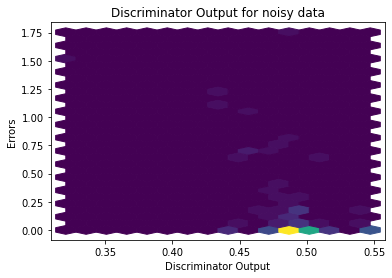

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


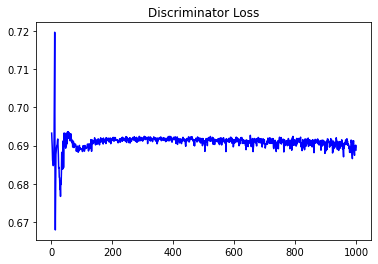

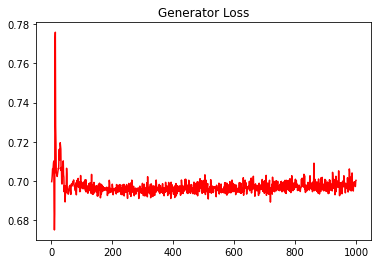

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07543668640717766


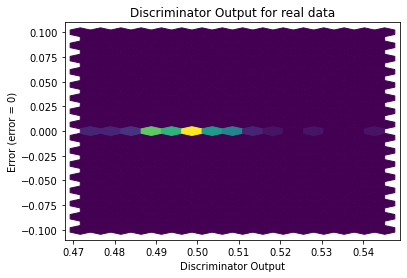

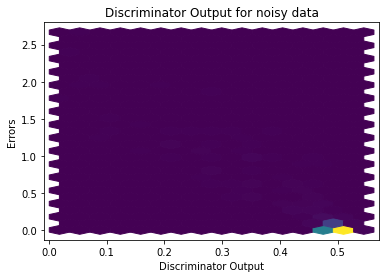

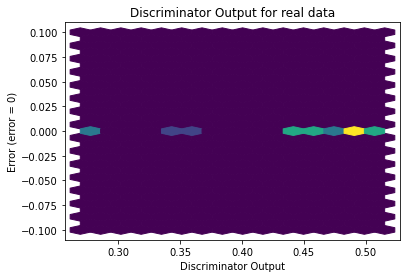

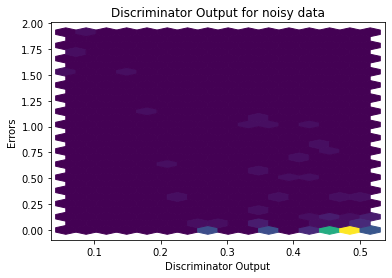

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6112]], requires_grad=True)
